In [1]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import pandas as pd

import wandb
wandb.login()
api = wandb.Api()

sweeps = [
    api.sweep("dpfrommer-projects/pusht_estimator/uc9m74jy"),
    api.sweep("chryu/pusht_dp/mny9gbjk")
]

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: dpfrommer (dpfrommer-projects). Use `wandb login --relogin` to force relogin


In [11]:

data = []
for sweep in sweeps:
    for r in sweep.runs:
        config = r.config
        run = {
            "mean_reward": r.summary["mean_reward"],
            "std_reward": r.summary["std_reward"]/np.sqrt(16), # mean std
            "trajectories": config["train_trajectories"]
        }
        if config["method"] == "estimator":
            run.update({
                "method": f"est/{config["env_type"]}",
            })
        elif config["method"] == "diffusion_policy":
            run.update({"method": "diffusion_policy"})
        data.append(run)

data = pd.DataFrame(data)
data

,mean_reward,std_reward,trajectories,method
0,0.419537,0.084944,174,est/positional
1,0.419596,0.080517,130,est/positional
2,0.332903,0.057423,80,est/positional
3,0.227029,0.049750,30,est/positional
4,0.398785,0.077446,174,est/keypoint
5,0.432427,0.083067,130,est/keypoint
6,0.413322,0.084031,80,est/keypoint
7,0.381033,0.068206,30,est/keypoint
8,0.806090,0.062431,174,est/rel_keypoint
9,0.757681,0.062383,130,est/rel_keypoint


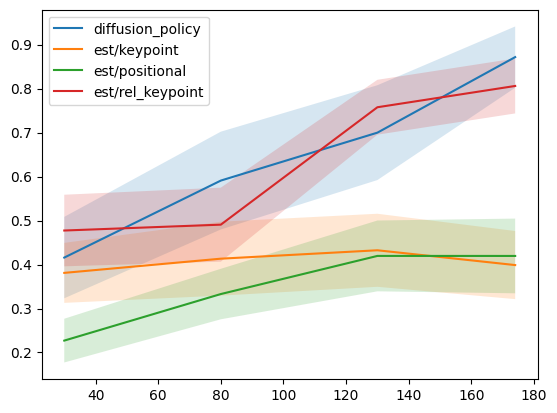

In [17]:

def plot_err(x, y, yerr, **kwargs):
    plt.plot(x, y, **kwargs)
    plt.fill_between(x, y-yerr, y+yerr, alpha=0.18)

for method, method_data in data.groupby("method"):
    plot_err(method_data["trajectories"], 
        method_data["mean_reward"], 
        method_data["std_reward"],
        label=method
    )
plt.legend()